In [16]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [17]:
dados = pd.read_csv('../Dados/Clean_Dataset.csv')
dados.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
print('O Dataset contém %d linhas e %d colunas'%dados.shape)

O Dataset contém 300153 linhas e 12 colunas


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [20]:
# Removendo a coluna Unnamed: 0 
dados.drop(columns = ['Unnamed: 0'], inplace = True)
dados.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
# Exibindo os valores únicos para as variáveis categóricas
colunas = dados[['airline', 'flight', 'source_city','departure_time','stops','arrival_time','destination_city','class']]
for coluna in colunas:
    unicos = dados[coluna].unique()
    print(unicos)
  

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


   Este conjunto de dados contém em sua maioria **variáveis categóricas**, acima é possível obsersar os valores únicos para cada coluna. Com excessão da coluna flight, as demais colunas são compostas por até 6 diferentes dados.
   
   
   Para facilitar a compreensão dos dados presentes em cada coluna, segue abaixo uma breve explicação de cada coluna:
+ **Dicionário dos dados:**
    
    - **Airline**: Possui o nome das companhia aérias; 
    - **Flight**: Possui informações sobre o código da areonave que irá realizar o voo;
    - **Source_city**: Possui o nome da cidade de origem do voo;
    - **Departure_time**: Possui o período do dia em que a partida ocorreu;
    - **Stops**: Possui o número de paradas realizadas entre a origem e o destino;
    - **Arrival_time**: Possui o período do dia em que a chegada ao destino ocorreu;
    - **Destination_city**: Possui o nome da cidade de destino do voo;
    - **Class**: Indica qual é a classe do assento;
    - **Duration**: A duração da viagem em horas;
    - **Days_left**: Indica quantos dias restam até a viagem;
    - **Price**: O preço da passagem aéria.


# Análise exploratória dos dados

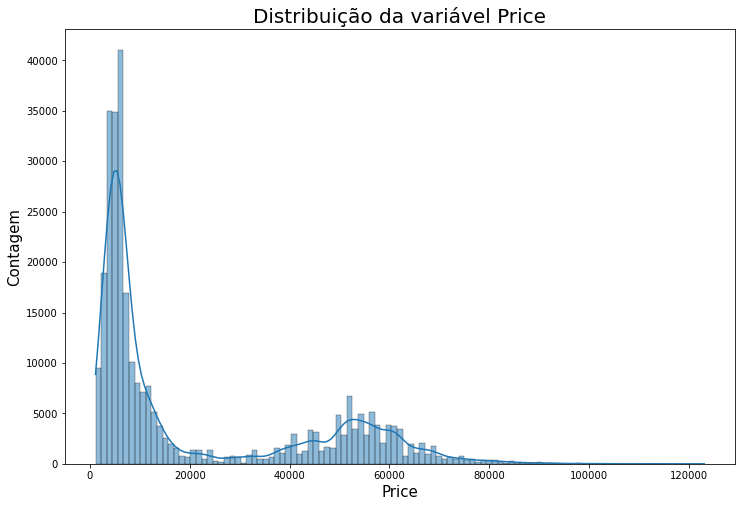

In [22]:
# Observando o comportamento da variável target
ax = sns.histplot(dados['price'], kde = True)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição da variável Price', fontsize = 20)
ax.set_xlabel('Price', fontsize = 15)
ax.set_ylabel('Contagem', fontsize = 15)
ax = ax

> Os preços presentes neste conjunto de dados possuem um comportamento assimétrico a direita, visto que possuem uma grande quantidade de voo com valores abaixo de 20000

In [23]:
# Definindo uma função para plotagem dos gráficos de barra
def graf_bar(x, titulo, xlabel):
    ax = sns.barplot(x = x, y= 'price', hue = x, data = dados, palette='Blues_d', dodge = False)
    ax.figure.set_size_inches(12,8)
    ax.set_title(titulo, fontsize = 20)
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel('Ticket price', fontsize = 15)
    ax = ax
    return ax

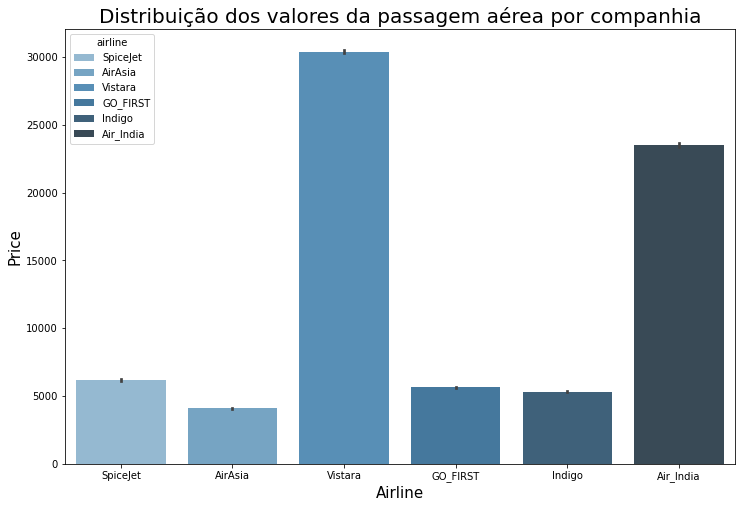

In [24]:
#Plotando um gráfico de barras para as variáveis Airline e Price
ax = sns.barplot(x = 'airline', y= 'price', hue = 'airline', data = dados, palette='Blues_d', dodge = False)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores da passagem aérea por companhia', fontsize = 20)
ax.set_xlabel('Airline', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax = ax

> Existe uma variação considerável entre os preços das passagens para as companhias **Vistara** e **Air_India**. A diferença entre os valores cobrados pela Air India e pela Vistara chegam a ser quase 5 ou 6 vezes maior que as outras 4 empresas abordadas neste Dataset.

<AxesSubplot:title={'center':'Valores das passagens aéreas de acordo com a origem da viagem'}, xlabel='Source City', ylabel='Ticket price'>

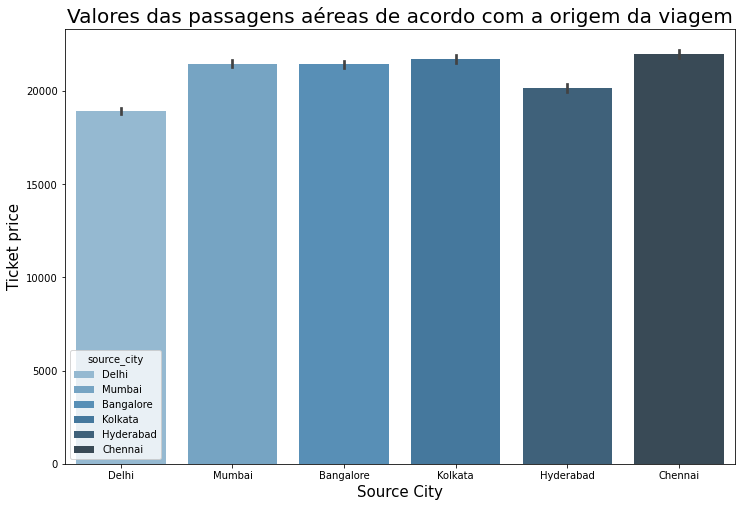

In [25]:
# Plotando um gráfico de barras para as variáveis Source City e Price
graf_bar('source_city','Valores das passagens aéreas de acordo com a origem da viagem', 'Source City')

> Aparentemente não existe uma variação considerável entre os valores cobrados pelas passagens aéreas de acordo com o aeroporto de origem. 

<AxesSubplot:title={'center':'Valor da passagem aérea de acordo com o período de partida '}, xlabel='Departure Time', ylabel='Ticket price'>

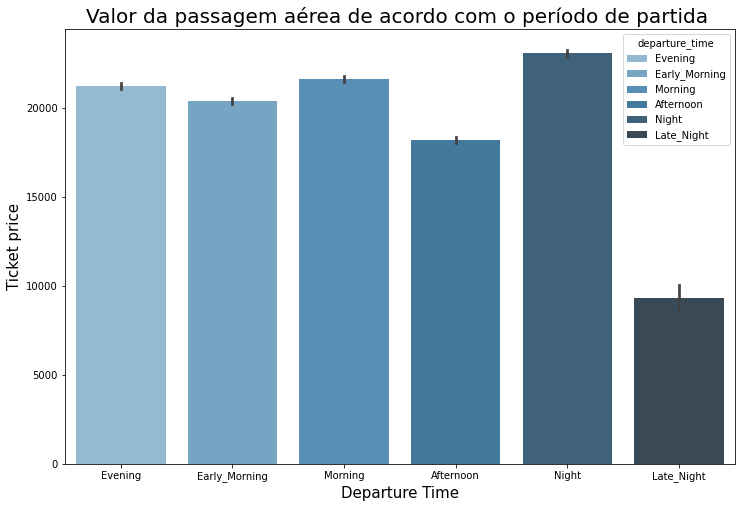

In [26]:
# Plotando um gráfico de barras para as variáveis Departure Time e Price
graf_bar('departure_time', 'Valor da passagem aérea de acordo com o período de partida ', 'Departure Time')

> O preço da passagem para partidas durante a madrugada são mais baixos.

<AxesSubplot:title={'center':'Valor da passagem aérea de acordo com o número de paradas'}, xlabel='Stops', ylabel='Ticket price'>

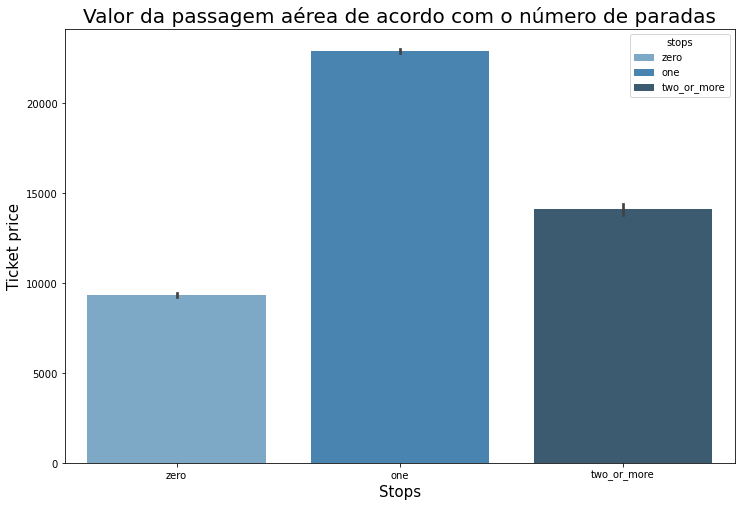

In [27]:
# Plotando um gráfico de barras para as variáveis Stops e Price
graf_bar('stops','Valor da passagem aérea de acordo com o número de paradas','Stops')

> Os valores praticados para viagens que não possuem paradas, durante a viagem, são os menores. Já para aquele que possuem apenas uma parada apresentam o maior valor.

<AxesSubplot:title={'center':'Valor da passagem aérea de acordo com o período de chegada'}, xlabel='Arrival Time', ylabel='Ticket price'>

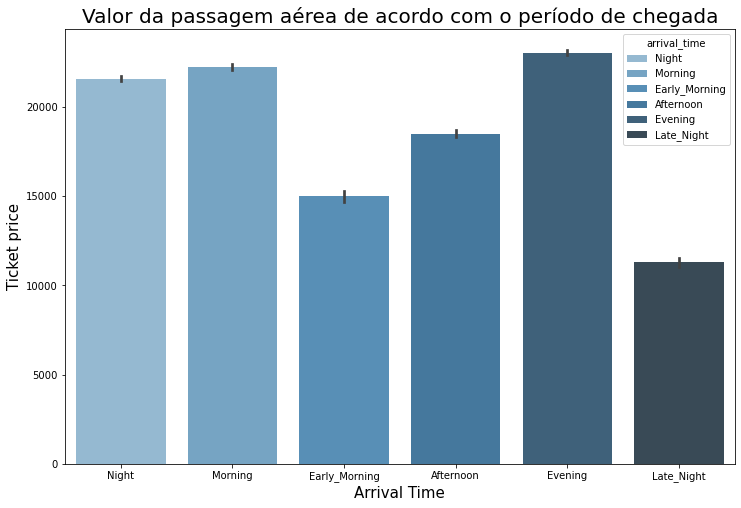

In [28]:
# Plotando um gráfico de barras para as variáveis Arrival time e Price
graf_bar('arrival_time','Valor da passagem aérea de acordo com o período de chegada','Arrival Time' )

> Sobre a variação dos valores observados para cada período da chegada, é possível observar que as passagem com previsão de chegada durante a madrugada ou logo cedinho possuem valores menores quando comparados com os outros períodos.

<AxesSubplot:title={'center':'Valor da passagem de acordo com o destino'}, xlabel='Destination City', ylabel='Ticket price'>

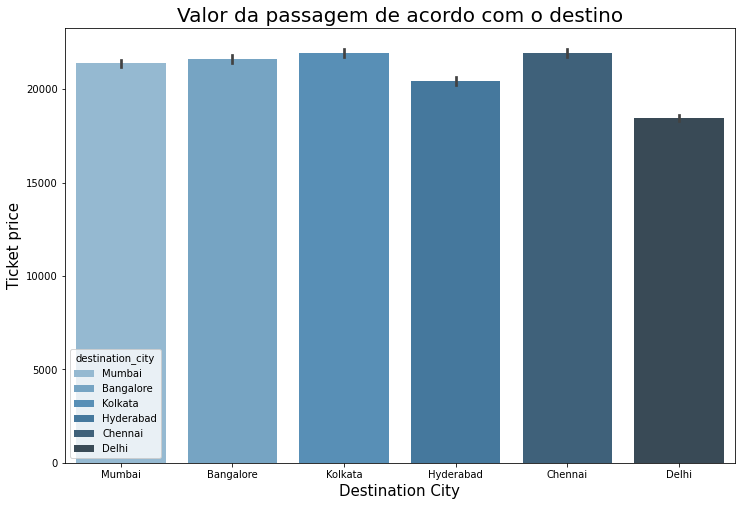

In [29]:
# Plotando um gráfico de barras para as variáveis Destination City e Price
graf_bar('destination_city','Valor da passagem de acordo com o destino','Destination City')

> Não existe uma variação considerável nos preços entre os diferentes destinos

<AxesSubplot:title={'center':'Valor da passagem de acordo com a classe do assento'}, xlabel='Class', ylabel='Ticket price'>

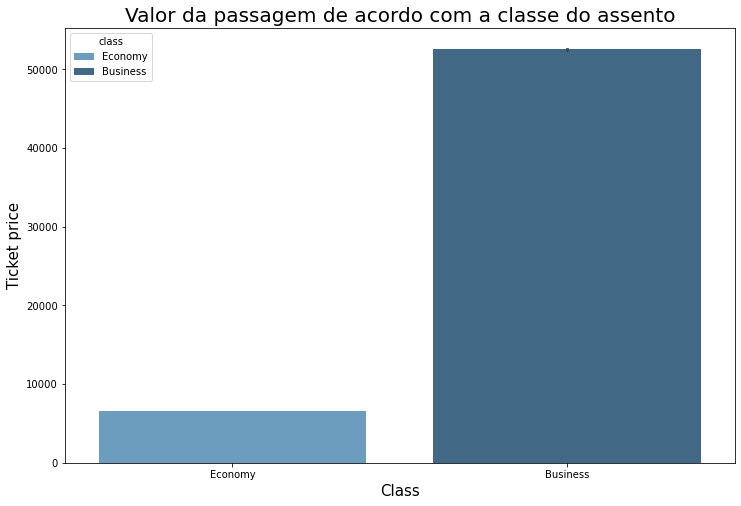

In [30]:
# Plotando um gráfico de barras para as variáveis Class e Price
graf_bar('class','Valor da passagem de acordo com a classe do assento','Class')

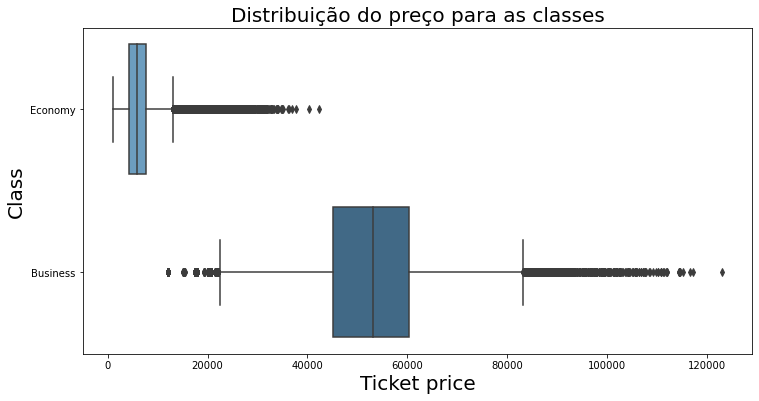

In [31]:
# Plotando um boxplot para as variáveis price e class
ax = sns.boxplot(x = 'price', y = 'class', data = dados, palette='Blues_d')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição do preço para as classes', fontsize = 20)
ax.set_xlabel('Ticket price', fontsize = 20)
ax.set_ylabel('Class', fontsize = 20)
ax = ax

In [32]:
dados.groupby(['class'])['price'].describe().T

class,Business,Economy
count,93487.000000,206666.000000
mean,52540.081124,6572.342383
std,12969.314606,3743.519517
min,12000.000000,1105.000000
25%,45185.000000,4173.000000
50%,53164.000000,5772.000000
75%,60396.000000,7746.000000
max,123071.000000,42349.000000


> Como pode-se Observar, existe uma enorme diferença entre os valores praticados para as diferentes classes. Os valores cobrados para a classe executiva chega a ser mais ou menos 5 vezes maior que a econômica.

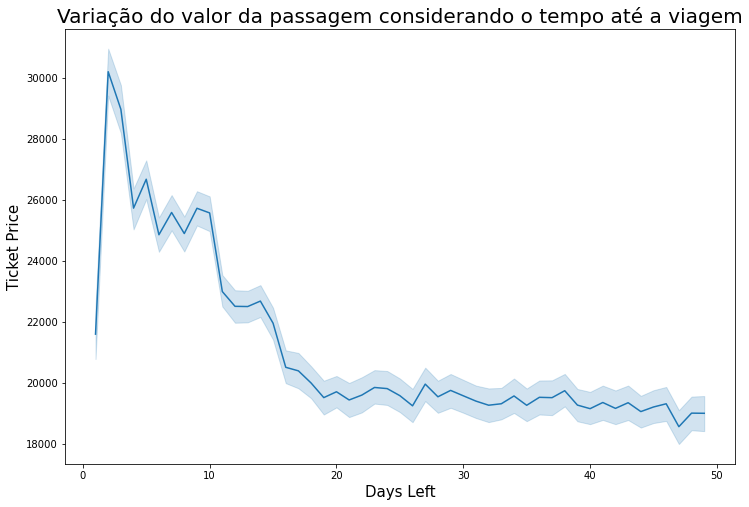

In [33]:
# Plotando um gráfico de linha com os preços da passagem pra todo o intervalo
ax = sns.lineplot(x = 'days_left', y = 'price', data = dados)
ax.figure.set_size_inches(12,8)
ax.set_title('Variação do valor da passagem considerando o tempo até a viagem', fontsize = 20)
ax.set_xlabel('Days Left', fontsize = 15)
ax.set_ylabel('Ticket Price', fontsize = 15)
ax = ax

<AxesSubplot:title={'center':'Variação do valor da passagem considerando um período até a viagem menor que 10 dias'}, xlabel='Days Left', ylabel='Ticket Price'>

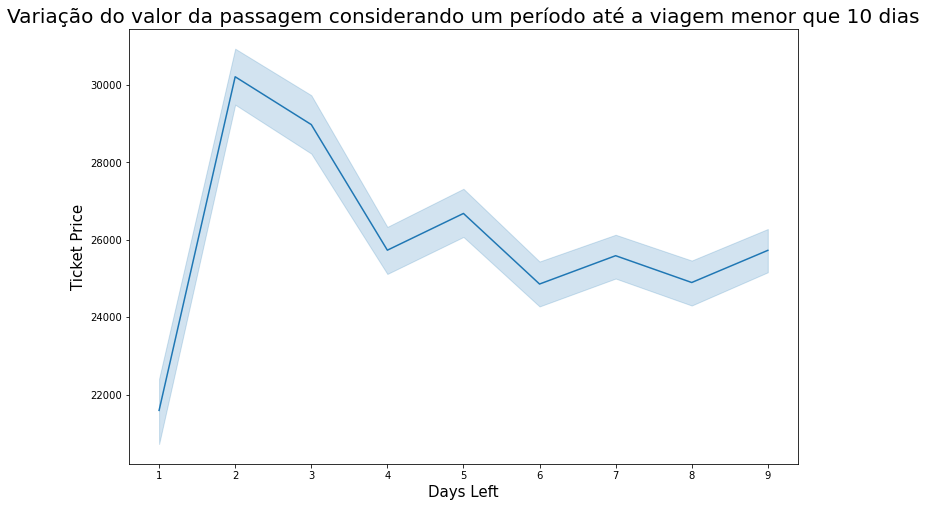

In [34]:
# Plonto um novo gráfico de linha para um intervalo de tempo menor(< 10 dias)
N_dados = dados.query('days_left < 10')

ax = sns.lineplot(x = 'days_left', y = 'price', data = N_dados)
ax.figure.set_size_inches(12,8)
ax.set_title('Variação do valor da passagem considerando um período até a viagem menor que 10 dias', fontsize = 20)
ax.set_xlabel('Days Left', fontsize = 15)
ax.set_ylabel('Ticket Price', fontsize = 15)
ax

> O preço das passagens compradas no intervalo entre 1 e 2 dias são os mais altos e decrescem na medida que o intervalo de tempo entre a compra do bilhete e a viagem aumenta, como pode-se observar nos dois gráficos acima.

## Conclusão da Análise exploratória

Durante esta análise foi possível observar que o preço da passagem aérea não costuma variar de acordo com todos fatores presentes no Dataset. Logo, destaco abaixo alguns pontos de destaque desta análise:
 
 **1** - De acordo com os resultados otidos com os gráficos de barra, as **origens** ou seu **destinos** das viagens, registradas neste conjunto de dados, parecem **não apresentar um impacto significante no valor da passagem**.
 
 **2** - **O valor da passagem é consideravelmente mais alto no período entre 1 e 2** dias antes da viagem e diminuem gradativamente com o aumento do intervalo entre a compra do bilhete e a o dia de realização da viagem.

**3** - Existe uma diferença considerável entre as **classes** do assento, a executiva apresenta valores quase 5 vezes mais altos que os encontrados na econômica.

**4** - Também existe uma variação de preço associada ao período de **partida** e **chegada** dos voos. Na partida, os voos que tem previsão de saída durante a madrugada são mais baratos quando comparados aos demais períodos. Já na chegada, os voos que possuem previsão de chegada aos seus destinos durante a madrugada ou logo nas primeiras horas da manhã possuem **preços mais baixos**.
 
 **5** - As companhia aéreas **Vistara** e **Air_India** apresentam as **passagens mais caras**, dentre as abordadas aqui.
 
 **6** - Voos com apenas **uma parada** entre a origem e o destino apresentam um **preço mais elevado** quando comparado a voos que não fazem nenhuma ou duas paradas durante o trajeto.

# Encoding dos dados

In [35]:
dados.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [36]:
#Instaciando um objeto LabelEncoder
enc = LabelEncoder()

# Realizando o encolding das variáveis categóricas
dados['airline'] = enc.fit_transform(dados['airline'])
dados['source_city'] = enc.fit_transform(dados['source_city'])
dados['departure_time'] = enc.fit_transform(dados['departure_time'])
dados['stops'] = enc.fit_transform(dados['stops'])
dados['arrival_time'] = enc.fit_transform(dados['arrival_time'])
dados['destination_city'] = enc.fit_transform(dados['destination_city'])
dados['class'] = enc.fit_transform(dados['class'])

dados.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


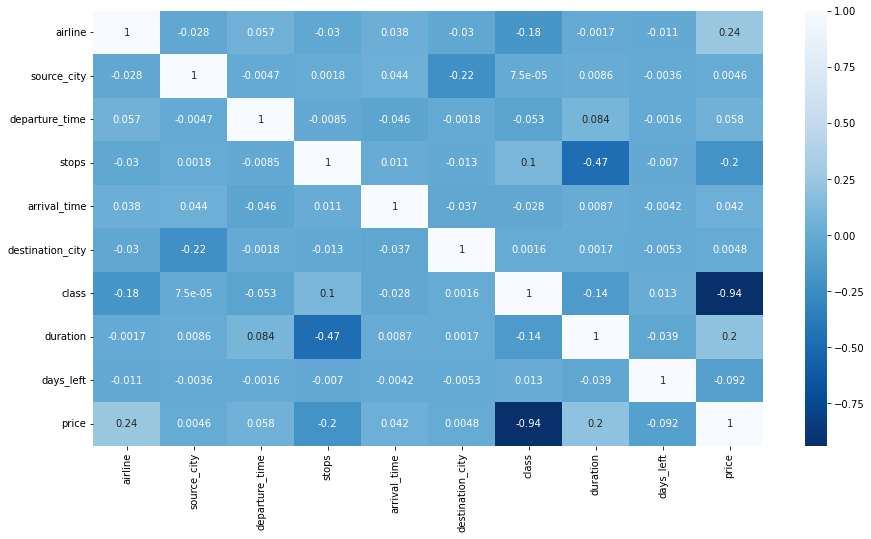

In [37]:
# Plotando o gráfico de correlação entre as variáveis.
correlacao = dados.corr()
ax = sns.heatmap(correlacao, annot = True, cmap = 'Blues_r')
ax.figure.set_size_inches(15,8)
ax = ax

In [38]:
# Separando as variáveis X e y
X = dados.drop(['flight', 'price'], axis = 1)
y = dados['price']

In [39]:
from sklearn.model_selection import train_test_split
# Definindo uma SEED
SEED = 7
np.random.seed(SEED)

# Separandos as variáveis x e y entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Modelagem

Como existem mais de uma variável explicativa, será necessária realizar uma regressão multivariada e por isso o **R² score** não irá representar uma métrica tão boa para a escolha do melhor modelo, logo irei utilizar o **R² ajustado** e a **raiz do erro quadrático médio** para escolher qual deverá ser o modelo utilizado.

O R² ajustado irá indicar o quão ajustados os dados estão a nosso modelo, ele sofre um impacto negativo caso existam variáveis que não contribuam para explicar a variável algo. **Quanto maior é o R² ajustado, melhor é o modelo.**

Já a raiz do erro quadrático médio, como o nome já indica, irá calcular a raiz da média dos erros entre os valores previstos e os reais. Ao contrário da nétrica anterior, **quanto menor for o RMSE melhor**.

In [40]:
# Criando, ajustando e obtendo os resultados para o modelo LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Métricas
score_r2 = r2_score(y_test, y_pred)*100
r2_aju = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1))*100
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print('O R² score do Linear Regression foi de %.4f%%' % score_r2)
print('O R² ajustado foi de %.4f%%' % r2_aju)      
print('A raiz do erro quadrático médio foi de %.2f'% RMSE)

O R² score do Linear Regression foi de 90.4145%
O R² ajustado foi de 90.4136%
A raiz do erro quadrático médio foi de 7033.43


In [41]:
# Criando, ajustando e obtendo os resultados para o modelo Random Forest Regressor
rfr = RandomForestRegressor(n_estimators = 50, random_state = SEED)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Métricas
score_r2 = r2_score(y_test, y_pred)*100
r2_aju = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1))*100
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print('O R² score do Random Forest Regressor foi de %.4f%%' % score_r2)
print('O R² ajustado foi de %.4f%%' % r2_aju)      
print('A raiz do erro quadrático médio foi de %.2f'% RMSE)   

O R² score do Random Forest Regressor foi de 98.5081%
O R² ajustado foi de 98.5080%
A raiz do erro quadrático médio foi de 2774.78


In [42]:
# Criando, ajustando e obtendo os resultados para o modelo KNeighbors Regressor
knnr = KNeighborsRegressor()
knnr.fit(X_train, y_train)
y_pred = knnr.predict(X_test)

# Métricas
score_r2 = r2_score(y_test, y_pred)*100
r2_aju = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1))*100
RMSE = (np.sqrt(mean_squared_error(y_test, y_pred)))

print('O R² score do KNeighbors Regressor foi de %.4f%%' % score_r2)
print('O R² ajustado foi de %.4f%%' % r2_aju)      
print('A raiz do erro quadrático médio foi de %.2f'% RMSE) 

O R² score do KNeighbors Regressor foi de 68.9465%
O R² ajustado foi de 68.9434%
A raiz do erro quadrático médio foi de 12659.48


>Dentre os três modelos de regressão utilizados neste projeto, o modelo **Random Forest Regressor** foi o que apresentou as melhores métricas, com um **R² ajustado** de 98.5% e um **RMSE** de 2774.78.